ModuleNotFoundError: No module named 'google.colab'

In [1]:
!pip install tensorflow
!pip install keras

In [24]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y-hWKQEmvOoWBDJAbK5YgepYBH1u5Fyvh-SluVlxDD2K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fruitset-donotdelete-pr-8fqk5yezvb2gvm'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [25]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [26]:
pwd

'/home/wsuser/work'

In [27]:
import os
filenames=os.listdir('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set')

In [28]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [31]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=25,width_shift_range=0.1,
    height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
path_train = '/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'
path_test = '/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set'

In [33]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [34]:
model = Sequential()

In [35]:
# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 300, activation = 'relu'))
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dense(units = 9, activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 300)               8

In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [38]:
history=model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 385s 808ms/step - loss: 1.1711 - accuracy: 0.5852 - val_loss: 0.7911 - val_accuracy: 0.7231
Epoch 2/10
475/475 [==============================] - 381s 801ms/step - loss: 0.6351 - accuracy: 0.7707 - val_loss: 0.7669 - val_accuracy: 0.7515
Epoch 3/10
475/475 [==============================] - 380s 800ms/step - loss: 0.4507 - accuracy: 0.8405 - val_loss: 0.4338 - val_accuracy: 0.8551
Epoch 4/10
475/475 [==============================] - 384s 809ms/step - loss: 0.3999 - accuracy: 0.8588 - val_loss: 0.3590 - val_accuracy: 0.8639
Epoch 5/10
475/475 [==============================] - 378s 797ms/step - loss: 0.3234 - accuracy: 0.8866 - val_loss: 0.4212 - val_accuracy: 0.8569
Epoch 6/10
475/475 [==============================] - 380s 799ms/step - loss: 0.3125 - accuracy: 0.8913 - val_loss: 0.2292 - val_accuracy: 0.9169
Epoch 7/10
475/475 [==============================] - 385s 809ms/step - loss: 0.2677 - accuracy: 0.9058 - val_loss: 0.3877 -

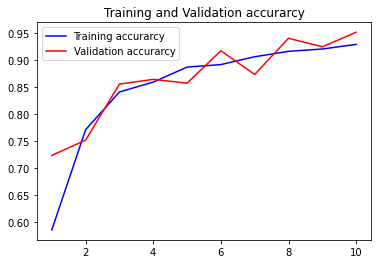

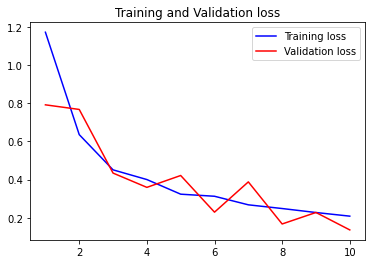

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [41]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
143/143 [==============================] - 27s 188ms/step - loss: 0.1363 - accuracy: 0.9511
Test Accuracy: 95.11123895645142


In [42]:
model.save('Vegetable.h5')

In [43]:
!tar -zcvf Vegetable_model.tgz Vegetable.h5

Vegetable.h5


In [44]:
ls

'Dataset Plant Disease'/   Vegetable.h5   Vegetable_model.tgz


In [45]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 10.9 MB/s eta 0:00:01


In [127]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"SC_TXHVXR7T22uu3xTOeL_MGHIvqnv4bXLn1LaUC0Ea0"
}
client=APIClient(wml_credentials)

In [128]:
client=APIClient(wml_credentials)

In [129]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources']if item ['entity']["name"] == space_name)['metadata']['id'])

In [130]:
space_uid=guid_from_space_name(client,'Vegetable_set')
print("SPACE_UID = "+space_uid)

SPACE_UID = d0b7a371-5877-42a6-a33a-a2e9b2b973c3


In [131]:
client.set.default_space(space_uid)

'SUCCESS'

In [132]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [133]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")

In [134]:
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [144]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

In [145]:
model=load_model("Vegetable.h5")

In [164]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y-hWKQEmvOoWBDJAbK5YgepYBH1u5Fyvh-SluVlxDD2K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fruitset-donotdelete-pr-8fqk5yezvb2gvm'
object_key = '01a8cc9f-074a-4866-87c8-bb5a9e3895b4___RS_LB 2968.JPG'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [165]:
img=Image.open(streaming_body_3)
target_size=(128,128)
img=img.resize(target_size)

In [166]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [167]:
pred=model.predict(x)
y=np.argmax(pred,axis=1)
y[0]

6

In [168]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Late_blight'